In [ ]:
1.formula  wt(x1-x2)|w|=2/|w|

In [ ]:
2. objectives of cost function: value should be max
modification of cost function : mix 


In [ ]:
3.
functions that take low dimensional input space and transform it into a higher-dimensional space

In [ ]:
4. roles of support vector which help to classify the dataset better

In [29]:
#6.
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import pandas as pd
data=load_iris()


In [30]:
x=pd.DataFrame(data.data, columns=data.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y=data.target
y
#['setosa', 'versicolor', 'virginica']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [33]:
from sklearn.svm import SVC
scv=SVC()
scv.fit(x_train, y_train)
y_pred=scv.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.92        12
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

[[14  0  0]
 [ 0 12  0]
 [ 0  2 10]]
0.9473684210526315


In [49]:
from sklearn.model_selection import GridSearchCV
para1={"C":[2,3,4,5,6,7],
      }
gscv=GridSearchCV(SVC(),param_grid=para1, cv=5)

In [54]:
gscv.fit(x_train, y_train)
gscv.best_params_


{'C': 4}

In [53]:
y_pred1=gscv.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

[[14  0  0]
 [ 0 12  0]
 [ 0  1 11]]
0.9736842105263158


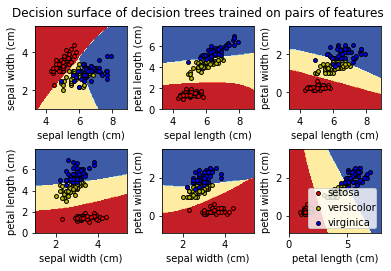

In [73]:
from sklearn.datasets import load_iris

iris = load_iris()

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = SVC().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [75]:
5.Hard margin is case in SVc which data will not overlap hence no error 
Soft margin is case in SVC data of will we overlap and provude some error
Hyperplane is place formued when 3d in which plane of liner regression model 
Marginal plane is plane formte a distance from hyperplace of outer & inner side


5.0